Threshold Tuning Results:

Threshold: 0.30 | Accuracy: 0.9578 | Spam Recall: 0.9533 | Spam F1: 0.8589
Threshold: 0.31 | Accuracy: 0.9632 | Spam Recall: 0.9533 | Spam F1: 0.8746
Threshold: 0.32 | Accuracy: 0.9641 | Spam Recall: 0.9533 | Spam F1: 0.8773
Threshold: 0.33 | Accuracy: 0.9668 | Spam Recall: 0.9533 | Spam F1: 0.8854
Threshold: 0.34 | Accuracy: 0.9686 | Spam Recall: 0.9533 | Spam F1: 0.8910
Threshold: 0.35 | Accuracy: 0.9713 | Spam Recall: 0.9533 | Spam F1: 0.8994
Threshold: 0.36 | Accuracy: 0.9704 | Spam Recall: 0.9400 | Spam F1: 0.8952
Threshold: 0.37 | Accuracy: 0.9704 | Spam Recall: 0.9333 | Spam F1: 0.8946
Threshold: 0.38 | Accuracy: 0.9713 | Spam Recall: 0.9333 | Spam F1: 0.8974
Threshold: 0.39 | Accuracy: 0.9740 | Spam Recall: 0.9333 | Spam F1: 0.9061
Threshold: 0.40 | Accuracy: 0.9731 | Spam Recall: 0.9267 | Spam F1: 0.9026
Threshold: 0.41 | Accuracy: 0.9731 | Spam Recall: 0.9267 | Spam F1: 0.9026
Threshold: 0.42 | Accuracy: 0.9740 | Spam Recall: 0.9267 | Spam F1: 0.905

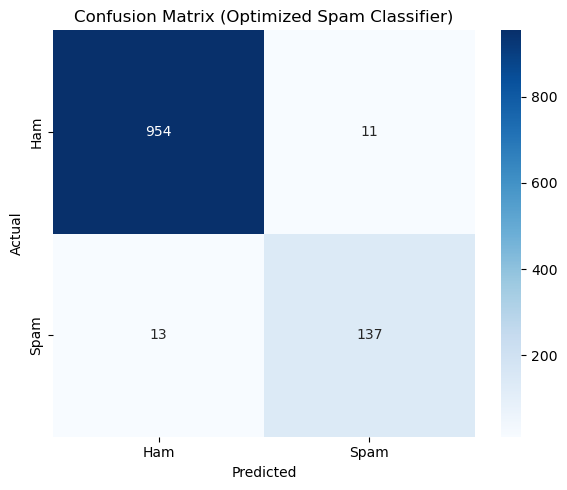

In [6]:
import sys
import io
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load and clean dataset
df = pd.read_csv('emailspam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# 2. Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# 4. Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# 5. Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Prob of spam

# 6. Threshold tuning to find best F1-score for spam
from sklearn.metrics import classification_report

best_f1 = 0
best_threshold = 0
best_report = None
best_accuracy = 0

print("Threshold Tuning Results:\n")
for t in [i / 100 for i in range(30, 61, 1)]:  # 0.30 to 0.60
    y_pred_t = (y_probs > t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    report = classification_report(y_test, y_pred_t, target_names=["Ham", "Spam"], output_dict=True)

    spam_f1 = report['Spam']['f1-score']
    spam_recall = report['Spam']['recall']

    print(f"Threshold: {t:.2f} | Accuracy: {acc:.4f} | Spam Recall: {spam_recall:.4f} | Spam F1: {spam_f1:.4f}")

    if spam_f1 > best_f1:
        best_f1 = spam_f1
        best_threshold = t
        best_report = report
        best_accuracy = acc

# 7. Final prediction using best threshold
y_pred = (y_probs > best_threshold).astype(int)

# 8. Final evaluation printout
print("\nBest Threshold Selected Automatically")
print(f" Threshold: {best_threshold:.2f}")
print(f" Accuracy: {best_accuracy:.4f}")
print(f" Final Spam Recall: {best_report['Spam']['recall']:.4f}")
print(f" Final Spam F1-Score: {best_report['Spam']['f1-score']:.4f}")

# 9. Save confusion matrix
cm = confusion_matrix(y_test, y_pred)
os.makedirs("Task-1-Email-Spam-Detection/results", exist_ok=True)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix (Optimized Spam Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("Task-1-Email-Spam-Detection/results/confusion_matrix.png")
print(" Confusion matrix saved at: Task-1-Email-Spam-Detection/results/confusion_matrix.png")